In [158]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import cmocean.cm as cm
import cartopy.crs as ccrs

https://data.cioospacific.ca/erddap/info/index.html?page=1&itemsPerPage=1000

link above can navigate to the metadata for all these datasets

In [160]:
data = pd.read_csv('ElwhaPoly_01_BCLightstation_08032023_OG.csv')
list(data.columns)
needed = data[['latitude','longitude','time', 'TEMPTC01','PSALPR01']]
sea_surface = np.zeros(len(needed)) + 0.5
needed['depth'] = sea_surface
print(needed.head(2))
needed = needed.rename(columns={"TEMPTC01": "TEMPS901", "PSALPR01":"PSALST01"})
print(needed.head(2))

# needed.to_csv('ElwhaPoly_01_BCLightstation_08032023.csv',index=False)
Elwha_01 = needed

print(Elwha_01.head(2))

        latitude     longitude                  time TEMPTC01 PSALPR01  depth
0  degrees_north  degrees_east                   UTC     degC   PSS-78    0.5
1        48.9222     -125.5408  2019-11-23T00:00:00Z      9.7     28.8    0.5
        latitude     longitude                  time TEMPS901 PSALST01  depth
0  degrees_north  degrees_east                   UTC     degC   PSS-78    0.5
1        48.9222     -125.5408  2019-11-23T00:00:00Z      9.7     28.8    0.5
        latitude     longitude                  time TEMPS901 PSALST01  depth
0  degrees_north  degrees_east                   UTC     degC   PSS-78    0.5
1        48.9222     -125.5408  2019-11-23T00:00:00Z      9.7     28.8    0.5


In [161]:
#TODO: re-download some of this data, it's all NaN right now
data = pd.read_csv('ElwhaPoly_02_BCLightstation_08032023_OG.csv')
# list(data.columns)
# needed = data[['latitude','longitude','time', 'TEMPTC01','PSALPR01']]
# sea_surface = np.zeros(len(needed)) + 0.5
# needed['depth'] = sea_surface
# needed

In [162]:
data = pd.read_csv('ElwhaPoly_03_IOSRosetteBottle_08032023_try2.csv')
list(data.columns)
needed = data[['latitude','longitude', 'time', 'TEMPS901', 'PSALST01', 'depth']]

# needed.to_csv('ElwhaPoly_03_IOSRosetteBottle_08032023.csv',index=False)
Elwha_03 = needed

In [181]:
data = pd.read_csv('ElwhaPoly_04_IOSCTDProfile_08032023_try3.csv')
list(data.columns)
needed = data[['latitude','longitude', 'time', 'TEMPS901', 'PSALST01', 'depth']]

# needed.to_csv('ElwhaPoly_04_IOSCTDProfile_08032023.csv',index=False)
Elwha_04 = needed

/tmp/ipykernel_2332591/2351887763.py:1: DtypeWarning: Columns (8,10,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ElwhaPoly_04_IOSCTDProfile_08032023_try3.csv')


In [164]:
data = pd.read_csv('HomathkoPoly_01_HakaiProfiles_08032023_OG.csv')
needed = data[['latitude','longitude', 'time', 'temperature', 'salinity', 'depth']]
# assumed that the temperatures are the same and that PSS-78 is the same as PSU as according to google. not sure about g/kg from here?
needed = needed.rename(columns={"temperature": "TEMPS901", "salinity":"PSALST01"})  #TODO: check the units on this one specifically

# needed.to_csv('HomathkoPoly_01_HakaiProfiles_08032023.csv',index=False)
Homathko_01 = needed

/tmp/ipykernel_2332591/553482937.py:1: DtypeWarning: Columns (5,11,12,13,14,23,24,27,30,32,33,35,36,38,39,42,45,48,51,54,57,60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('HomathkoPoly_01_HakaiProfiles_08032023_OG.csv')


In [165]:
data = pd.read_csv('HomathkoPoly_03_IOSRosetteBottle_08032023_OG.csv')
needed = data[['latitude','longitude', 'time', 'TEMPS901', 'PSALST01', 'depth']]

# needed.to_csv('HomathkoPoly_03_IOSRosetteBottle_08032023.csv',index=False)
Homathko_03 = needed

In [166]:
data = pd.read_csv('HomathkoPoly_04_IOSCTDProfile_08032023_OG.csv')
needed = data[['latitude','longitude', 'time', 'TEMPS901', 'PSALST01', 'depth']]

# needed.to_csv('HomathkoPoly_04_IOSCTDProfile_08032023.csv',index=False)
Homathko_04 = needed

In [167]:
data = pd.read_csv('SquamishPoly_01_IOSRosetteBottle_08032023_OG.csv')
needed = data[['latitude','longitude', 'time', 'TEMPS901', 'PSALST01', 'depth']]

# needed.to_csv('SquamishPoly_01_IOSRosetteBottle_08032023.csv',index=False)
Squamish_01 = needed

In [188]:
data = pd.read_csv('SquamishPoly_02_IOSCTSProfile_08032023_OG.csv')
needed = data[['latitude','longitude', 'time', 'TEMPS901', 'PSALST01', 'depth']]

# needed.to_csv('SquamishPoly_02_IOSCTSProfile_08032023.csv',index=False)
Squamish_02 = needed

In [189]:
data = pd.read_csv('IOS_CTD_Profiles_data_cioospacific_ca.csv')
needed = data[['latitude','longitude', 'time', 'TEMPS901', 'PSALST01', 'depth']]

# needed.to_csv('Elwha_try.csv',index=False)
Elwha_try = needed

In [169]:
units = Elwha_01.head(1)

In [183]:
all_data = pd.concat([Elwha_01, Elwha_03.tail(-1), Elwha_04.tail(-1), Homathko_01.tail(-1), Homathko_03.tail(-1), Homathko_04.tail(-1), Squamish_01.tail(-1), Squamish_02.tail(-1)], ignore_index=True)
all_data['year'] = [i.split('-')[0] for i in all_data['time']]
data_2023 = pd.concat([units, all_data[all_data['year'] == '2023']], ignore_index=True)
data_2022 = all_data[all_data['year'] == '2022']
data_2021 = all_data[all_data['year'] == '2021']
data_2020 = all_data[all_data['year'] == '2020']
data_2019 = pd.concat([units, all_data[all_data['year'] == '2019']], ignore_index=True)
data_2018 = all_data[all_data['year'] == '2018']

In [185]:
data_2023.to_csv('Polysel_data_2023.csv', index=False)
data_2022.to_csv('Polysel_data_2022.csv', index=False)
data_2021.to_csv('Polysel_data_2021.csv', index=False)
data_2020.to_csv('Polysel_data_2020.csv', index=False)
data_2019.to_csv('Polysel_data_2019.csv', index=False)
data_2018.to_csv('Polysel_data_2018.csv', index=False)

## Fix the IOS files

In [172]:
good = pd.read_csv('ElwhaPoly_03_IOSRosetteBottle_08032023.csv')

IOS_Elwha_CTD = pd.read_csv('ElwhaPoly_04_IOSCTDProfile_08032023.csv')
IOS_Homathko_CTD = pd.read_csv('HomathkoPoly_04_IOSCTDProfile_08032023.csv')
IOS_Squamish_CTD = pd.read_csv('SquamishPoly_02_IOSCTSProfile_08032023.csv')

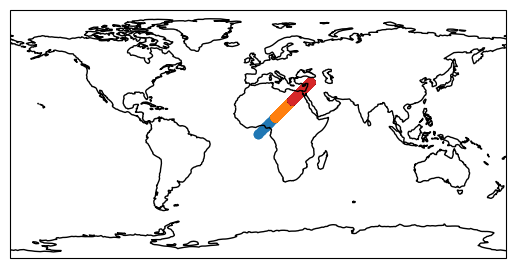

In [173]:
# # cmap = cm.haline
# cmap = 'Greys'
# # cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 9))
# # salinity = np.ma.masked_array(phys_rivers.vosaline[1, 0], mask=tmask[0])
# colours = ax.pcolormesh(tmask*0.5, vmin=0, vmax=1, cmap=cmap)
# # cb = fig.colorbar(colours, ax=ax)

ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-125.08483,-123.2405, 49.369167,50.828167])
ax.set_extent([-180,180, -90,90])

ax.coastlines()
# ax.add_feature(cfeature.LAND)


ax.scatter(good['longitude'][1:-1], good['latitude'][1:-1])
ax.scatter(IOS_Elwha_CTD['longitude'][1:-1], IOS_Elwha_CTD['latitude'][1:-1])
ax.scatter(IOS_Homathko_CTD['longitude'][1:-1], IOS_Homathko_CTD['latitude'][1:-1])
ax.scatter(IOS_Squamish_CTD['longitude'][1:-1], IOS_Squamish_CTD['latitude'][1:-1])
# ax.scatter(comparisons2['i'], comparisons2['j'], alpha=0.5)

plt.show()

## Look at other csv for the units?

In [178]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0][0,:,:]

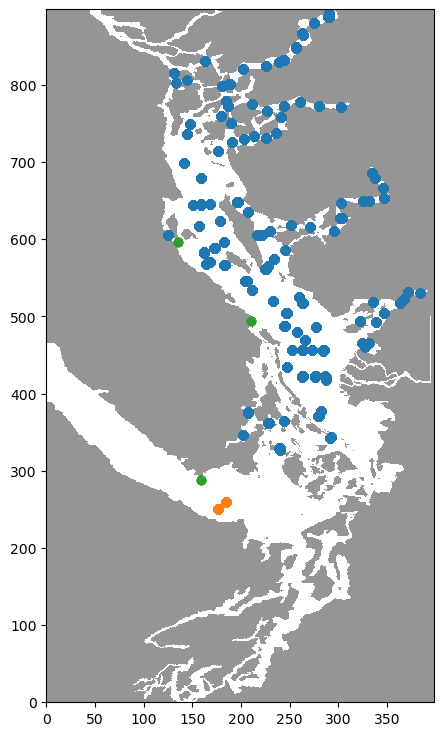

In [191]:
#TODO: make plot that shows all of the matched obs points
comparisons_2023 = pd.read_csv('../ObsModel_202111_CIOOS_20230101_20230805.csv')
comparisons_2022 = pd.read_csv('../ObsModel_202111_CIOOS_20220101_20221231.csv')
comparisons_2019 = pd.read_csv('../ObsModel_202111_CIOOS_20190101_20191231.csv')

# cmap = cm.haline
cmap = 'Greys'
# cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
# salinity = np.ma.masked_array(phys_rivers.vosaline[1, 0], mask=tmask[0])
colours = ax.pcolormesh(tmask*0.5, vmin=0, vmax=1, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax)

ax.scatter(comparisons_2023['i'], comparisons_2023['j'], alpha=0.5)
ax.scatter(comparisons_2022['i'], comparisons_2022['j'], alpha=0.5)
ax.scatter(comparisons_2019['i'], comparisons_2019['j'], alpha=0.5)